# Assignment 2

Modules used for the assignment

In [1]:
import io
import re
import os
import operator
import community
from collections import Counter
from collections import defaultdict
from bisect import bisect_left
import pandas as pd
import urllib2
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division

%matplotlib inline

## Part 1: Advanced Network Structure
>We start by looking at the structure of the the philosopher network using the more complicated network measures. If your network has more than one component, just work on the _giant connected component_ (GCC) in the exercises below (in a directed graph use the [_weakly_ connected component](https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.component.html)).

>Not all of the measures we'll be considering below are defined for directed graphs, thus begin by creating an [undirected version](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.DiGraph.to_undirected.html) of the philosopher graph, that we can use whenever needed. Only use the undirected graph when explicitly stated in the exercise.

In [2]:
list_of_philo=[] # This list will contain the branches.
list_of_list=[] # This list will a list for each branch which will contain all the names 
philo_loc = 'philo/'

for files in os.listdir(philo_loc):
    if files.endswith(".txt"):
        f = io.open(philo_loc+files, 'r', encoding='utf-8')
        link = re.findall(r'\*.*\[\[(.+?)\]\]?',f.read())
        name = []
        for k in link:
            name += [k.split('|')[0]]
        list_of_philo += [files.split('.')[0]]
        list_of_list += [name]
print list_of_philo

['aestheticians', 'epistemologists', 'ethicists', 'logicians', 'metaphysicians', 'political']


In [3]:
set_of_philosophers =set()

for branch in range(len(list_of_list)):
    for name in list_of_list[branch]:
        set_of_philosophers.add(name)

In [4]:
list_of_philosophers = list(set_of_philosophers)
match = []
json_loc = 'json/'

for philosoherps in list_of_philosophers:
    filename = philosoherps.replace(' ', '_')
    with io.open(json_loc+filename+".txt",'r',encoding='utf-8') as files:
        link = re.findall(r'\[\[(.+?)\]\]?',files.read())
        for item in link:
            item = item.split('|')[0]
            if item in list_of_philosophers:
                match.append((philosoherps, item))
print match[:10]

[(u'Christian Wolff (philosopher)', u'Gottfried Leibniz'), (u'Christian Wolff (philosopher)', u'Aristotle'), (u'Christian Wolff (philosopher)', u'Thomas Aquinas'), (u'Christian Wolff (philosopher)', u'Immanuel Kant'), (u'Christian Wolff (philosopher)', u'Alexander Gottlieb Baumgarten'), (u'Christian Wolff (philosopher)', u'Immanuel Kant'), (u'Christian Wolff (philosopher)', u'Gottfried Leibniz'), (u'Christian Wolff (philosopher)', u'Confucius'), (u'Christian Wolff (philosopher)', u'Voltaire'), (u'Christian Wolff (philosopher)', u'Voltaire')]


In [5]:
Full_DiG = nx.DiGraph()
Full_DiG.add_edges_from(match)

In [6]:
DiG = max(nx.weakly_connected_component_subgraphs(Full_DiG,copy=True),key=len)
UnG = DiG.to_undirected()

<hr>

* Find the 5 most central philosophers according to [betweenness centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html). What role do you imagine philosophers with high wikipedia graph betweenness centrality play in the history of philosophy?

In [7]:
b_cen_dict = nx.betweenness_centrality(DiG)
sorted_b_cen = sorted(b_cen_dict.items(), key=operator.itemgetter(1),reverse=True)
for i in range(5):
    print "Philosopher: %s. \t Betweenness centrality value: %s." %(sorted_b_cen[i][0],sorted_b_cen[i][1])

Philosopher: Immanuel Kant. 	 Betweenness centrality value: 0.0883788716806.
Philosopher: Bertrand Russell. 	 Betweenness centrality value: 0.0772155196034.
Philosopher: David Hume. 	 Betweenness centrality value: 0.0570443633056.
Philosopher: Aristotle. 	 Betweenness centrality value: 0.0557721733381.
Philosopher: Plato. 	 Betweenness centrality value: 0.0532717870671.


A high value of betweenness centrality would indicate that the work of the philosopher have a great influence on the surrounding nodes (philosophers).

<hr>

* Find the 5 most central philosophers according to [eigenvector centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html). Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). How is eigenvector centrality difference from degree centrality? Compare your results for eigenvector centrality to the results for betweenness centrality - does the difference make sense when you read the philosopher's wikipedia pages?

In [8]:
in_eig_cen = nx.eigenvector_centrality(DiG)
out_eig_cen = DiG.reverse()
out_eig_cen = nx.eigenvector_centrality(out_eig_cen)
sorted_in_eig_cen= sorted(in_eig_cen.items(), key=operator.itemgetter(1),reverse=True)
sorted_out_eig_cen= sorted(out_eig_cen.items(), key=operator.itemgetter(1),reverse=True)

In [9]:
for i in range(5):
    print "Philosopher: %s. \t \t in degree Eigenvector centrality value: %s." %(sorted_in_eig_cen[i][0],sorted_in_eig_cen[i][1])

Philosopher: Immanuel Kant. 	 	 in degree Eigenvector centrality value: 0.319880654521.
Philosopher: Aristotle. 	 	 in degree Eigenvector centrality value: 0.272656582395.
Philosopher: Bertrand Russell. 	 	 in degree Eigenvector centrality value: 0.24156788721.
Philosopher: Plato. 	 	 in degree Eigenvector centrality value: 0.219071695844.
Philosopher: Friedrich Nietzsche. 	 	 in degree Eigenvector centrality value: 0.202379848167.


In [10]:
for i in range(5):
    print "Philosopher: %s. \t \t out degree Eigenvector centrality value: %s." %(sorted_out_eig_cen[i][0],sorted_out_eig_cen[i][1])

Philosopher: Georg Wilhelm Friedrich Hegel. 	 	 out degree Eigenvector centrality value: 0.203208386646.
Philosopher: Martin Heidegger. 	 	 out degree Eigenvector centrality value: 0.189233785054.
Philosopher: Friedrich Nietzsche. 	 	 out degree Eigenvector centrality value: 0.187733490961.
Philosopher: Immanuel Kant. 	 	 out degree Eigenvector centrality value: 0.18273332905.
Philosopher: Michel Foucault. 	 	 out degree Eigenvector centrality value: 0.153020412693.


A high in degree eigenvector centrality does not tells us that the node have many links going to it, but how many relevant/important nodes link to it. The degree centrality only look at how many links is going to a node and nothing else, where as Eigenvector centrality make a node important if it link to by other importants nodes.

The values from Eigenvector centrality... (see [Eigenvector centrality](http://www.sci.unich.it/~francesc/teaching/network/eigenvector.html) for more info)

<hr>

* Is the _undirected version_ of the graph [assortative with respect do degree](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.assortativity.degree_assortativity_coefficient.html#networkx.algorithms.assortativity.degree_assortativity_coefficient)? (e.g. do high-degree philosophers tend to link to other high-degree philosophers, and low-degree philosophers to other low-degree philosophers?). Provide an interpretation of your answer!

In [11]:
r = nx.degree_assortativity_coefficient(UnG)
print r

-0.0749333563328


A negative value indicate that smiliar high-degree philosohers do not  tend to link to other high-degree.

<hr>

> We will now run community detection on the full philosopher network.

In [12]:
set_aes = set()
set_epi = set()
set_eth = set()
set_log = set()
set_met = set()
set_pol = set()

for i in range(len(list_of_list)):
    for item in list_of_list[i]:
        if i == 0:
            set_aes.add(item)
        elif i == 1:
            set_epi.add(item)
        elif i == 2:
            set_eth.add(item)
        elif i == 3:
            set_log.add(item)
        elif i == 4:
            set_met.add(item)
        else:
            set_pol.add(item)

In [13]:
xyz ={}
for i in range(len(match)):
    if xyz.has_key(match[i][0]):
        ph_str = str(match[i][0].encode('utf8'))
        if match[i][1] in set_aes:
            xyz[ph_str][0].add(match[i][1])
        elif match[i][1] in set_epi:
            xyz[ph_str][1].add(match[i][1])
        elif match[i][1] in set_eth:
            xyz[ph_str][2].add(match[i][1])
        elif match[i][1] in set_log:
            xyz[ph_str][3].add(match[i][1])
        elif match[i][1] in set_met:
            xyz[ph_str][4].add(match[i][1])
        elif match[i][1] in set_pol:
            xyz[ph_str][5].add(match[i][1])
    else:
        ph_str = str(match[i][0].encode('utf8'))
        xyz[ph_str] = [set(),set(),set(),set(),set(),set()]
for item in xyz['Eli Siegel']:
    print len(item)

2
0
1
0
0
0


In [14]:
list_of_sets = [set_aes,set_epi,set_eth,set_log,set_met,set_pol]
def delPhilo(key,index):
    for i in range(len(list_of_sets)):
        if index != i:
            list_of_sets[i].discard(key)

for key in xyz.keys():
    _ = max(enumerate(xyz[key]), key = lambda tup: len(tup[1]))
    delPhilo(key,_[0])
print len(set_aes),len(set_epi),len(set_eth),len(set_log),len(set_met),len(set_pol)

108 46 160 188 20 132


In [15]:
def getDeg (branch):
    links = 0
    degree = 0
    for i in range(len(match)):
        if match[i][0] in branch:
            if match[i][1] in branch:
                links = links + 1
            else:
                degree = degree + 1
    _ = [links, degree]
    return _

def getMod ():
    i = 0
    ii = 0
    list_of_set_str = ['set_aes','set_epi','set_eth','set_log','set_met','set_pol']
    for item in list_of_sets:
        _ = getDeg(item)
        Mod = (_[0]/len(set(match)))-(_[1]/(2*len(set(match))))**2
        print "The modularity for %s is %s." %(list_of_set_str[i],Mod)
        ii = Mod + ii
        i = i + 1
    print "The modularity for the whole network is %s." %ii
getMod()

The modularity for set_aes is 0.0555519537678.
The modularity for set_epi is 0.00652070892047.
The modularity for set_eth is 0.05778112768.
The modularity for set_log is 0.164654741876.
The modularity for set_met is 0.000363149013884.
The modularity for set_pol is 0.039812172423.
The modularity for the whole network is 0.324683853682.


* Use [the Python Louvain-algorithm implementation](http://perso.crans.org/aynaud/communities/) to find communities in the full philosopher network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the branches as communities? What does this comparison reveal about the branches?
   * \[**Note**: This implementation is now available as Anaconda package. Install with `conda` as expained [here](https://anaconda.org/auto/python-louvain)\].
   * You can also try the *Infomap* algorithm instead if you're curious. Go to [this page](http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.

In [16]:
Full_UnG = Full_DiG.to_undirected()

In [17]:
part = community.best_partition(Full_UnG)# Use Loucian on full network
community.modularity(part, Full_UnG)# Print the value od modularity

0.4530719809236054

# Comment on comparsion!!!!!

* Compare the communities found by your algorithm with the branches of philosophy (see [Lecture 5](http://nbviewer.jupyter.org/github/suneman/socialgraphs2016/blob/master/lectures/Week5.ipynb) for details on the branches) by creating a matrix **_D_** with dimension (_B_ times _C_), where _B_ is the number of branches and _C_ is the number of communities. We set entry _D_(_i_,_j_) to be the number of nodes that branch _i_ has in common with community _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the labeled branches of philosophy.

In [18]:
w, h = len(list_of_sets), len(set(part.values())) 
Matrix = [[0 for x in range(w)] for y in range(h)]
print w, h
for key in part.keys():
    if key in set_aes:
        Matrix[part[key]][0] =1
    elif key in set_epi:
        Matrix[part[key]][1] =1
    elif key in set_eth:
        Matrix[part[key]][2] =1
    elif key in set_log:
        Matrix[part[key]][3] =1
    elif key in set_met:
        Matrix[part[key]][4] =1
    elif key in set_pol:
        Matrix[part[key]][5] =1

for row in Matrix:
    print row

6 21
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 1]
[1, 0, 1, 1, 1, 0]
[1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 1]
[1, 0, 1, 0, 0, 1]
[1, 1, 1, 0, 0, 1]
[0, 0, 1, 0, 0, 0]
[1, 1, 1, 1, 0, 1]
[0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 1]
[0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0]


# Comment on exercise!!!!!

# Part II: Human navigation paths 

> This exercise works on the wikispeedia dataset. For details on wikispeedia, see [Lecture 8](http://nbviewer.jupyter.org/github/suneman/socialgraphs2016/blob/master/lectures/Week5.ipynb) 

In [19]:
location_unf = 'Week 8/wikispeedia_paths-and-graph/paths_unfinished.tsv'
location_fin = 'Week 8/wikispeedia_paths-and-graph/paths_finished.tsv'
location_links = 'Week 8/wikispeedia_paths-and-graph/links.tsv'
df1 = pd.read_csv(location_unf, sep='\t',encoding='utf-8',skiprows=16, names=['hashedIpAddress','timestamp','durationInSec','path','target','type'])
df2 = pd.read_csv(location_fin, sep='\t',encoding='utf-8',skiprows=16, names=['hashedIpAddress','timestamp','durationInSec','path','rating'])
df3 = pd.read_csv(location_links, sep='\t',encoding='utf-8',skiprows=12, names=['linkSource','linkTarget'])

In [20]:
df2[:5]

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3


# Comment on why we remove invalid node!!!!

In [21]:
invalid_node = 'Wikipedia_Text_of_the_GNU_Free_Documentation_License'
count = 0
for row in range(len(df2)):
    row_str = df2.get_value(row,'path')
    row_split = row_str.split(';')
    if invalid_node in row_split:
        df2.drop(df2.index[row-count], inplace=True)
        count = count +1
df2.reset_index(inplace=True)

### IIa: Path lengths

> The first thing we want to take a look at is path lengths. NetworkX allows us to calculate the shortest path between any pair of articles. We begin by comparing the length of human and shortests paths. 

* For each _source_/_target_ pair in the list of human navigation paths, calculate the shortest path using NetworkX. Plot the distribution of path lengths.

In [22]:
DG = nx.DiGraph()
count = 0
for row in df3.itertuples():
    DG.add_edge(row[1],row[2])

In [23]:
p=nx.shortest_path_length(DG)

In [24]:
list_of_numbers = []
i = 0
for source_node in p:
    for key in p[source_node]:
        list_of_numbers.append(p[source_node][key])

In [25]:
d_freq = Counter(list_of_numbers)

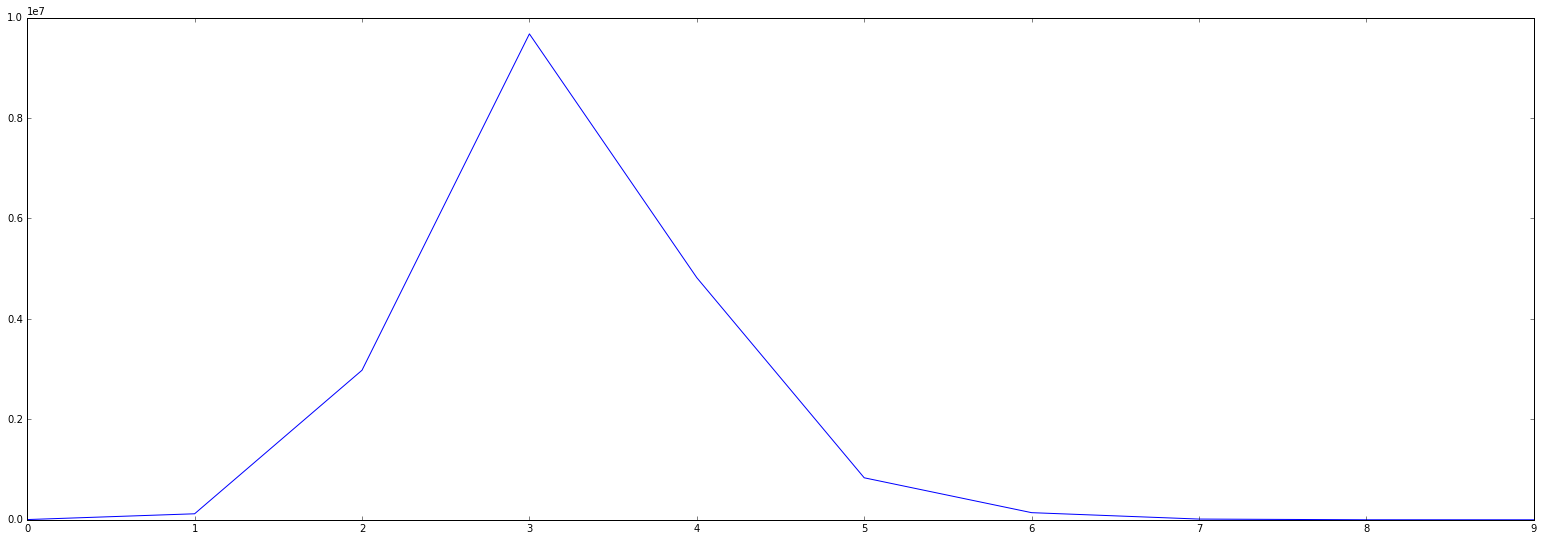

In [26]:
plt.figure(num=None, figsize=(27, 9), dpi=1200)
plt.plot(d_freq.keys(),d_freq.values())

* For each _source_/_target_ pair, calculate the length of the human path. The dataset contains information on people who regret a navigation step and hit the "back" button in their web-browser. It's up to you how to incorporate that information in the path. Justify your choice. Plot the distribution of human path lengths. 

In [27]:
list_of_human_path = []
for row in range(len(df2)):
    list_of_human_path.append(df2.get_value(row,'path').count(';'))

In [28]:
human_path_freq = Counter(list_of_human_path)

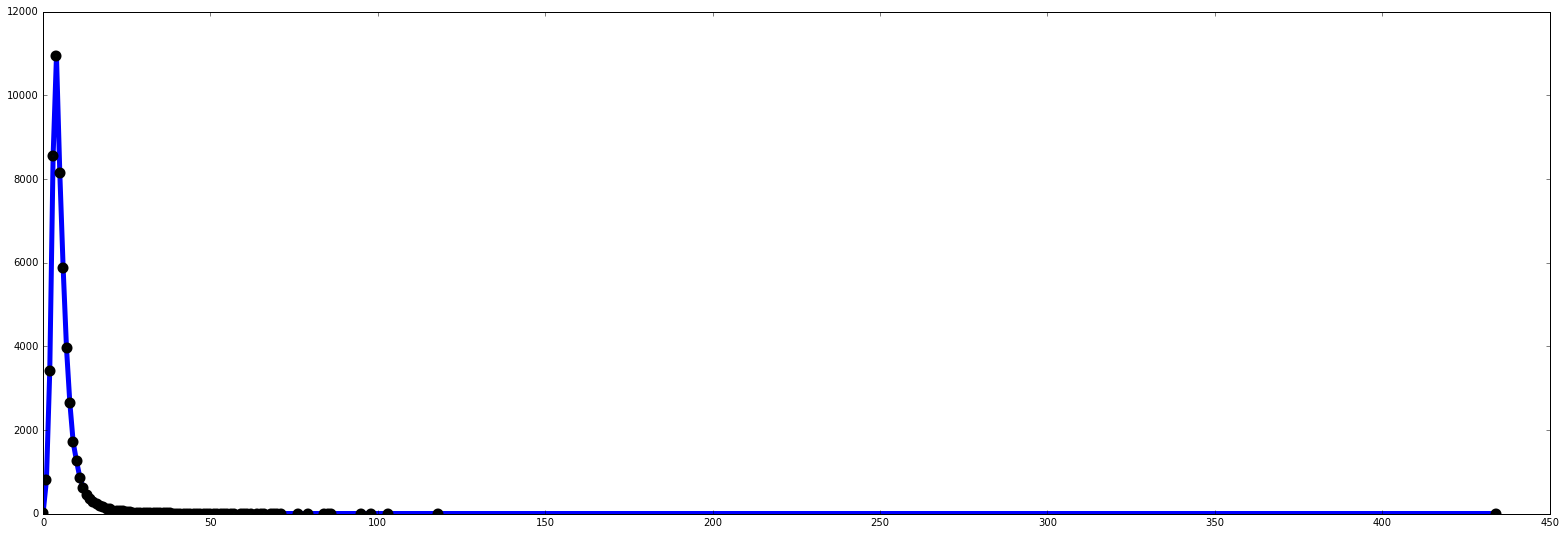

In [29]:
plt.figure(num=None, figsize=(27, 9), dpi=10)
plt.plot(human_path_freq.keys(),human_path_freq.values(),human_path_freq.keys(),human_path_freq.values(),'o',lw=5,mew=5)

* How much longer are the human paths on average?

In [30]:
human_path_mean = sum(list_of_human_path)/len(list_of_human_path)
shor_path_mean = sum(list_of_numbers)/len(list_of_numbers)

print 'The human path is %s longer than shorest path on average.' %(human_path_mean-shor_path_mean)

The human path is 2.5506864827 longer than shorest path on average.


# For return link we have include them as the overall path

<hr>

* Create scatter plot where each point is a _source_/_target_ pair, and you have human path lengths on the $x$-axis and shortests paths on the $y$-axis.

In [31]:
path_visited = {}
list_of_shortpath = []
def findShortPath(pair):
    if pair in path_visited.keys():
        list_of_shortpath.append(path_visited[pair])
    else:
        source = pair.split(',')[0]
        target = pair.split(',')[1]
        try:
            _ = len(nx.shortest_path(DG, source=source, target=target))-1
            path_visited[pair] = _
            list_of_shortpath.append(_)
        except:
            print 'Node do not exist.'

In [32]:
for row in range(len(df2)):
    row_str = df2.get_value(row,'path')
    row_split = row_str.split(';')
    source = row_split[0].decode('utf-8')
    target = row_split[len(row_split)-1].decode('utf-8')
    pair = source+','+target
    findShortPath(pair)

In [33]:
print len(list_of_human_path),len(list_of_shortpath)

51280 51280


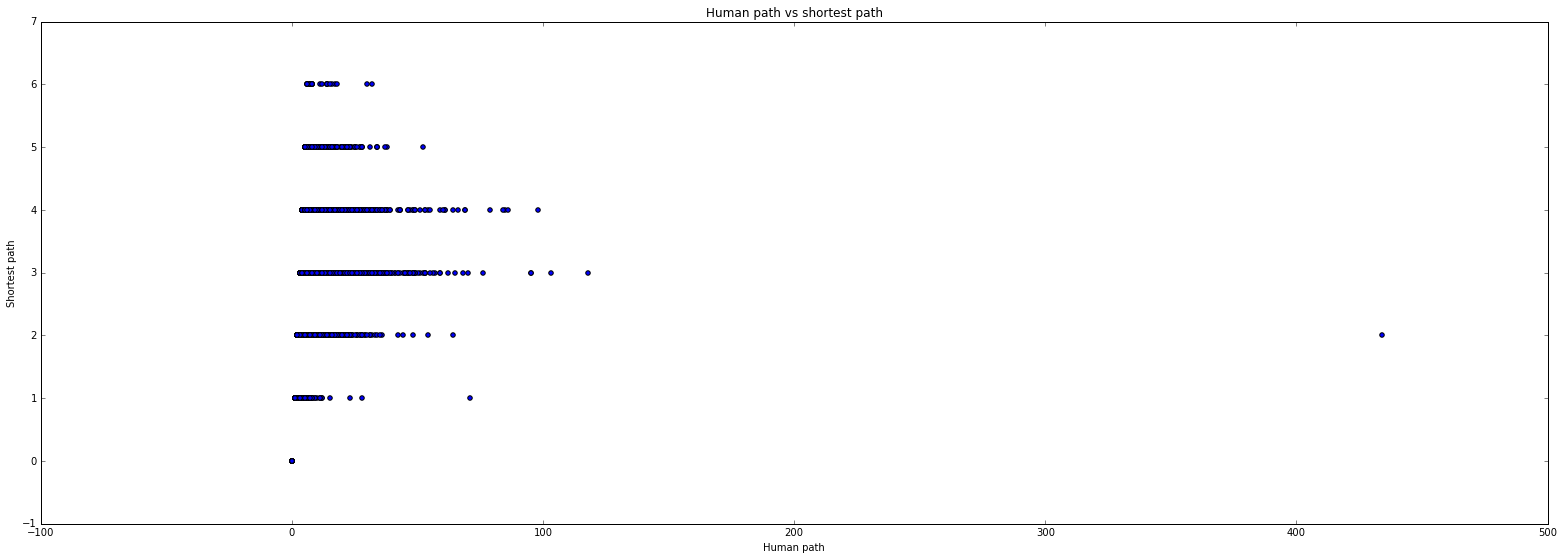

In [34]:
plt.figure(num=None, figsize=(27, 9))
plt.scatter(list_of_human_path,list_of_shortpath)
plt.ylabel('Shortest path')
plt.xlabel('Human path')
plt.title('Human path vs shortest path')

* Is there a correlation between human/shortest path-lengths? What is the correlation.

<hr>
### IIb: Betweenness

> An interesting definition of centrality is _betweenness centrality_. In a traditional setting, this measure calculates all shortest paths in the network and then each node gets a score according to which fraction of all shortest paths pass through that node.

> In this part of the assignment, we create our own version of centrality, based on the _source_/_target_ pairs in our dataset. We define a nodes's **navigation centrality** as follows. 

> > *Navigation centrality* of node $i$ is the fraction of all naviagtion paths that pass through $i$. We exclude the source and target from the count. If a node has not been visited by a search, the navigation centrality of that node is defined to be zero.

> Below, we investigate the relationship between navigation centrality and betweenness centrality.

 >Begin by calculating the betweenness centrality and navigation centrality of all nodes in the wikispedia dataset.
Note that calculating the betweenness centrality can take quite a long time, so you might start it running in a separate notebook while first estimating it based on the existing human path.

* First, list the 5 pages with highest navigation centrality.

In [65]:
##### Calculate navigation centrality
navi_path = []
for row_number in range(len(df2)):
    row_str = df2.get_value(row_number,'path')
    row_split = row_str.split(';')
    if len(row_split) < 3:
        pass
    else:
        end_point = len(row_split)-1
        for node in range(1,end_point):
            current_node = row_split[node].decode('utf-8')
            if current_node != '<':
                navi_path.append(current_node)
            
# Dict containing the navigation centrality for each node.
navi_cen = Counter(navi_path)

In [66]:
#Find every unique node
uni_node = set()
for row in df3.itertuples():
    uni_node.add(row[1])
    uni_node.add(row[2])

#Add nodes which have a navigation centrality of zero
for node in uni_node:
    if node not in navi_cen.keys():
        navi_cen[node] = 0
print len(navi_cen)

4592


In [95]:
#listing the first five pages with highest navigation centrality
print "Node \t\t\t Navigation_centrality \n"
for pair in navi_cen.most_common(5):
    if len(pair[0]) > 6:
        print "%s \t\t %s" %(pair[0],pair[1])
    else:
        print "%s \t\t\t %s" %(pair[0],pair[1])

Node 			 Navigation_centrality 

United_States 		 8814
Europe 			 4317
United_Kingdom 		 3859
Earth 			 3153
England 		 3121


* Second, list the 5 pages with highest betweenness centrality.

In [86]:
be_cen = nx.betweenness_centrality(DG)

In [94]:
sorted_be_cen = sorted(be_cen.items(), key=operator.itemgetter(1), reverse=True)
print "Node \t\t\t Betweenness centrality \n"
for i in range(5):
    if len(sorted_be_cen[i][0]) > 6:
        print "%s \t\t %s" %(sorted_be_cen[i][0],sorted_be_cen[i][1])
    else:
        print "%s \t\t\t %s" %(sorted_be_cen[i][0],sorted_be_cen[i][1])

Node 			 Betweenness centrality 

United_States 		 0.0940903732139
United_Kingdom 		 0.0423844487843
England 		 0.032402812854
Europe 			 0.0269916994737
Africa 			 0.0242041761902


* Compare the two lists. Explain the differences between the two lists in your own words.

# Explain here!!!!

<hr>
* Create a scatterplot of betweenness centrality vs. navigation centrality.

In [98]:
sorted_navi_cen = sorted(navi_cen.items(), key=operator.itemgetter(0))
sorted_be_cen = sorted(be_cen.items(), key=operator.itemgetter(0))

In [101]:
print len(sorted_navi_cen),len(sorted_be_cen)

4592 4592


In [103]:
navi_values = []
be_values = []
#Check if nodes do not match
for i in range(len(sorted_navi_cen)):
    if sorted_navi_cen[i][0] != sorted_be_cen[i][0]:
        print i
    else:
        navi_values.append(sorted_navi_cen[i][1])
        be_values.append(sorted_be_cen[i][1])

(0, 9000)

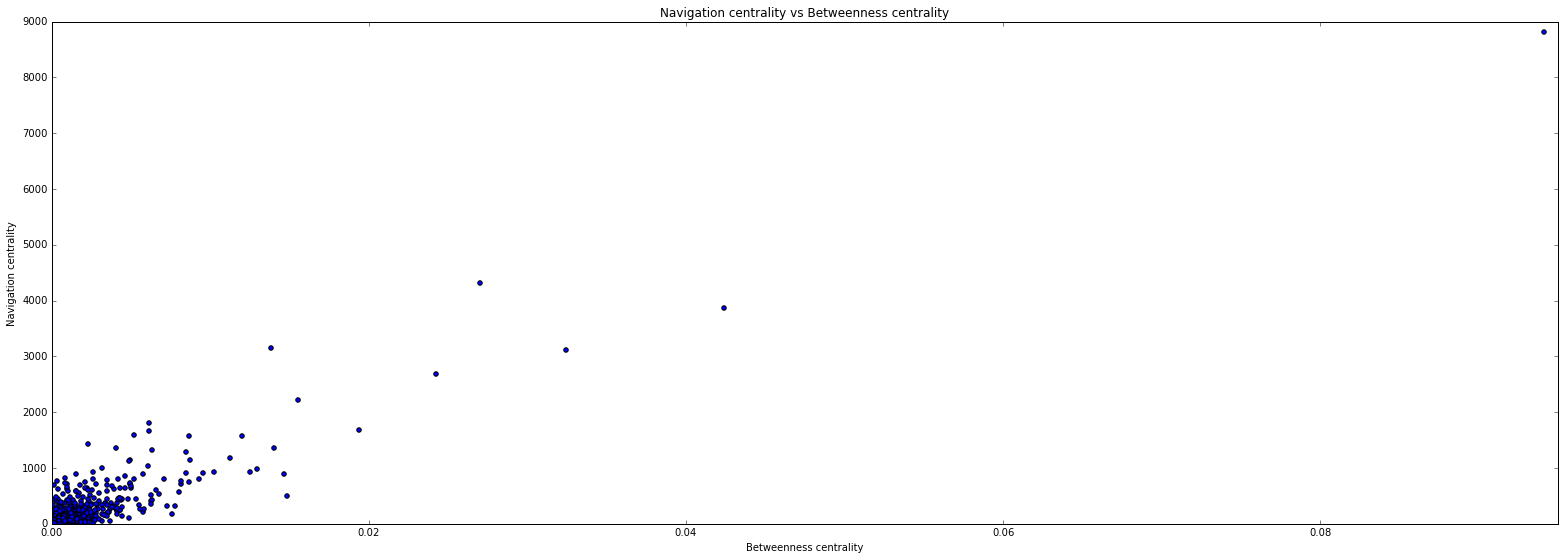

In [145]:
plt.figure(figsize=(27, 9))
plt.scatter(be_values,navi_values)
plt.ylabel('Navigation centrality')
plt.xlabel('Betweenness centrality')
plt.title('Navigation centrality vs Betweenness centrality')
plt.xlim(0, 0.095)
plt.ylim(0,9000)

<hr>
* Let's explore the pages that have navigation centrality equal to zero.
  * How many pages have zero navigation centrality?
  * What is the the page with zero navigation centrality and highest betweenness centrality? Can you explain why no human navigated to this page? Can you explain why the page is central in the actual link network? (For example, you can take a look at the degree of the node).
  * Plot the distribution of betweenness centrality for the pages with zero navigation centrality. 

In [119]:
count = 0
for number in navi_cen.values():
    if number is 0:
        count = count +1
print 'The amount of pages that have zero navigation centrality is %s.' %count

The amount of pages that have zero navigation centrality is 1187.


In [128]:
page_high_be = 0
page_name = ''
for page in navi_cen.keys():
    if navi_cen[page] is 0 and be_cen[page] > page_high_be:
        page_name = page
        page_high_be = be_cen[page]
print page_name,page_high_be

TGV 0.00112415650755


In [130]:
print DG.degree('TGV'),DG.in_degree('TGV'), DG.out_degree('TGV')

49 11 38


In [131]:
navi_be_cen = {}
for page in navi_cen.keys():
    if navi_cen[page] is 0:
        navi_be_cen[page] = be_cen[page]

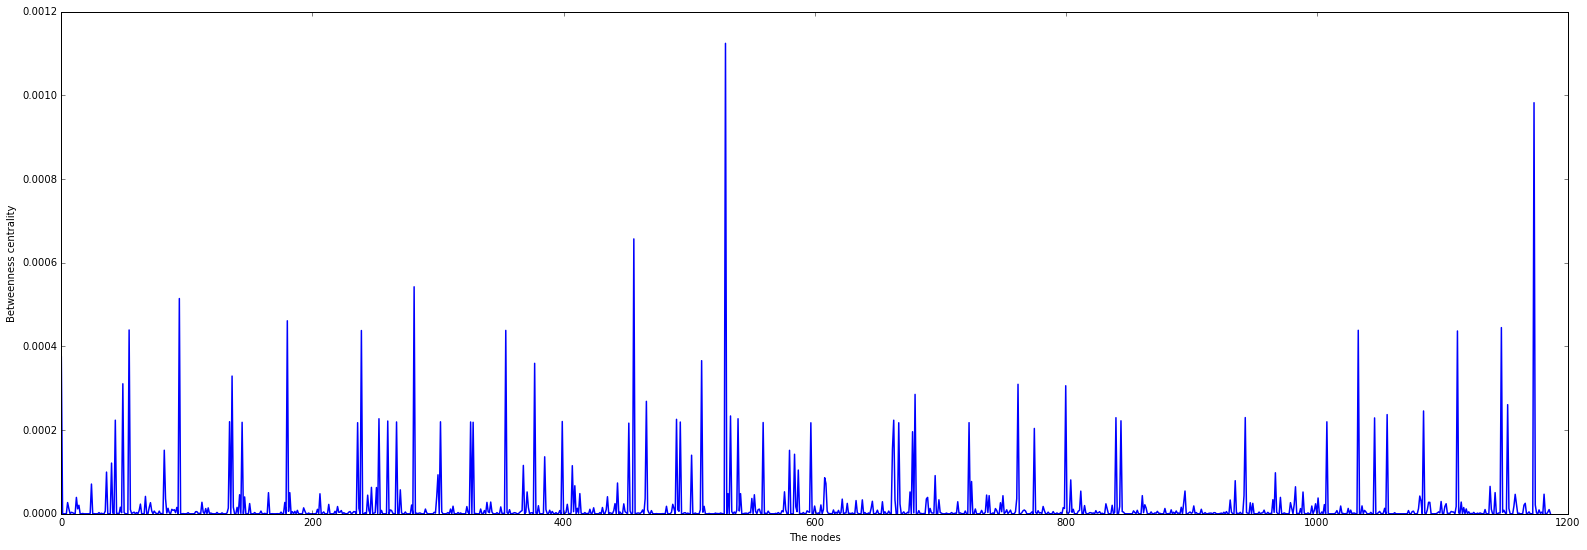

In [142]:
plt.figure(figsize=(27, 9))
plt.plot(navi_be_cen.values(),lw=1.5)
plt.ylabel('Betweenness centrality')
plt.xlabel('The nodes')

* Now, let's *throw out all pages with zero navigation centrality* and compare navigation- and betweenness centrality for the remaining pages.
  * What is the correlation between betweenness centrality and navigation centrality?
  * Comment on the top 5 outliers.

In [150]:
non_zero_navi_path = Counter(navi_path)
zero_navi_be_cen = be_cen
list_node_zero_navi = []
for node in uni_node:
    if node not in non_zero_navi_path.keys():
        list_node_zero_navi.append(node)
for node in list_node_zero_navi:
    zero_navi_be_cen.pop(node,None)

print len(non_zero_navi_path),len(zero_navi_be_cen)

3405 3405


In [151]:
sorted_zero_navi_be_cen = sorted(zero_navi_be_cen.items(), key=operator.itemgetter(0))
sorted_non_zero_navi_path = sorted(non_zero_navi_path.items(), key=operator.itemgetter(0))

In [153]:
zero_navi_values = []
zero_be_values = []
#Check if nodes do not match
for i in range(len(sorted_zero_navi_be_cen)):
    if sorted_zero_navi_be_cen[i][0] != sorted_non_zero_navi_path[i][0]:
        print i
    else:
        zero_navi_values.append(sorted_non_zero_navi_path[i][1])
        zero_be_values.append(sorted_zero_navi_be_cen[i][1])

(2500, 9000)

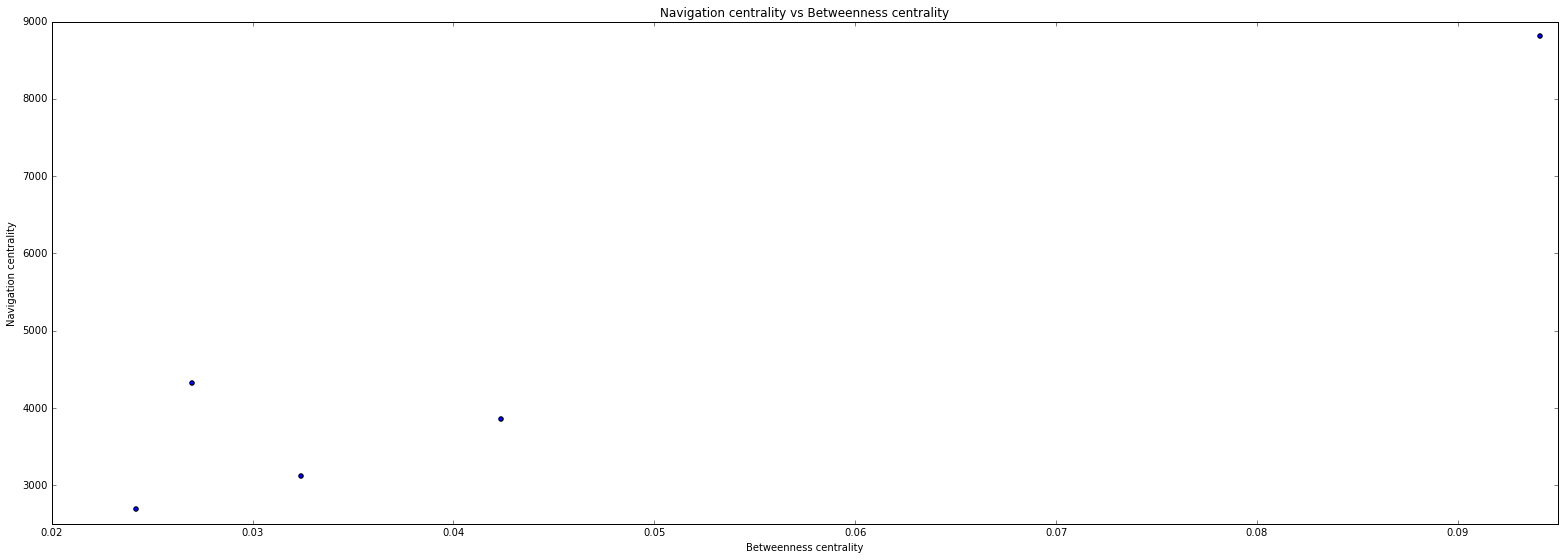

In [156]:
plt.figure(figsize=(27, 9))
plt.scatter(zero_be_values,zero_navi_values)
plt.ylabel('Navigation centrality')
plt.xlabel('Betweenness centrality')
plt.title('Navigation centrality vs Betweenness centrality')
plt.xlim(0.02, 0.095)
plt.ylim(2500,9000)